In [1]:
import numpy as np
from tensorflow.python.keras.models import load_model
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_height = 150
image_width = 150
batch_size = 8

In [3]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

normal_cases_dir = Path('D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test\\NORMAL')
pneumonia_cases_dir = Path('D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test\\PNEUMONIA')

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

test_data = []
test_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)
                      
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 150, 150, 3)
Total number of labels: (624, 1)


In [4]:
model_names=['PneumoniaNet6.h5','VGG16_Chest_X_Ray_Image_Classification_Pneumonia_vs_Normal_best_model.h5','InceptionV3_Chest_X_Ray_Image_Classification_Pneumonia_vs_Normal_best_model.h5','DenseNet121_Chest_X_Ray_Image_Classification_Pneumonia_vs_Normal_best_model.h5']

In [5]:
best_model=load_model(model_names[0])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [6]:
probs1 = best_model.predict_proba(test_data)
preds1 = probs1[:,1]

In [7]:
from sklearn.metrics import auc
precision1, recall1, thresholds1 = precision_recall_curve(test_labels.ravel(), preds1)
auc_var1 = auc(recall1, precision1)

In [8]:
best_model=load_model(model_names[1])

In [9]:
probs2 = best_model.predict_proba(test_data)
preds2 = probs2[:,1]
precision2, recall2, thresholds2 = precision_recall_curve(test_labels.ravel(), preds2)
auc_var2 = auc(recall2, precision2)

In [10]:
best_model=load_model(model_names[2])
probs3 = best_model.predict_proba(test_data)
preds3 = probs3[:,1]
precision3, recall3, thresholds3 = precision_recall_curve(test_labels.ravel(), preds3)
auc_var3 = auc(recall3, precision3)

In [11]:
best_model=load_model(model_names[3])
probs4 = best_model.predict_proba(test_data)
preds4 = probs4[:,1]
precision4, recall4, thresholds4 = precision_recall_curve(test_labels.ravel(), preds4)
auc_var4 = auc(recall4, precision4)

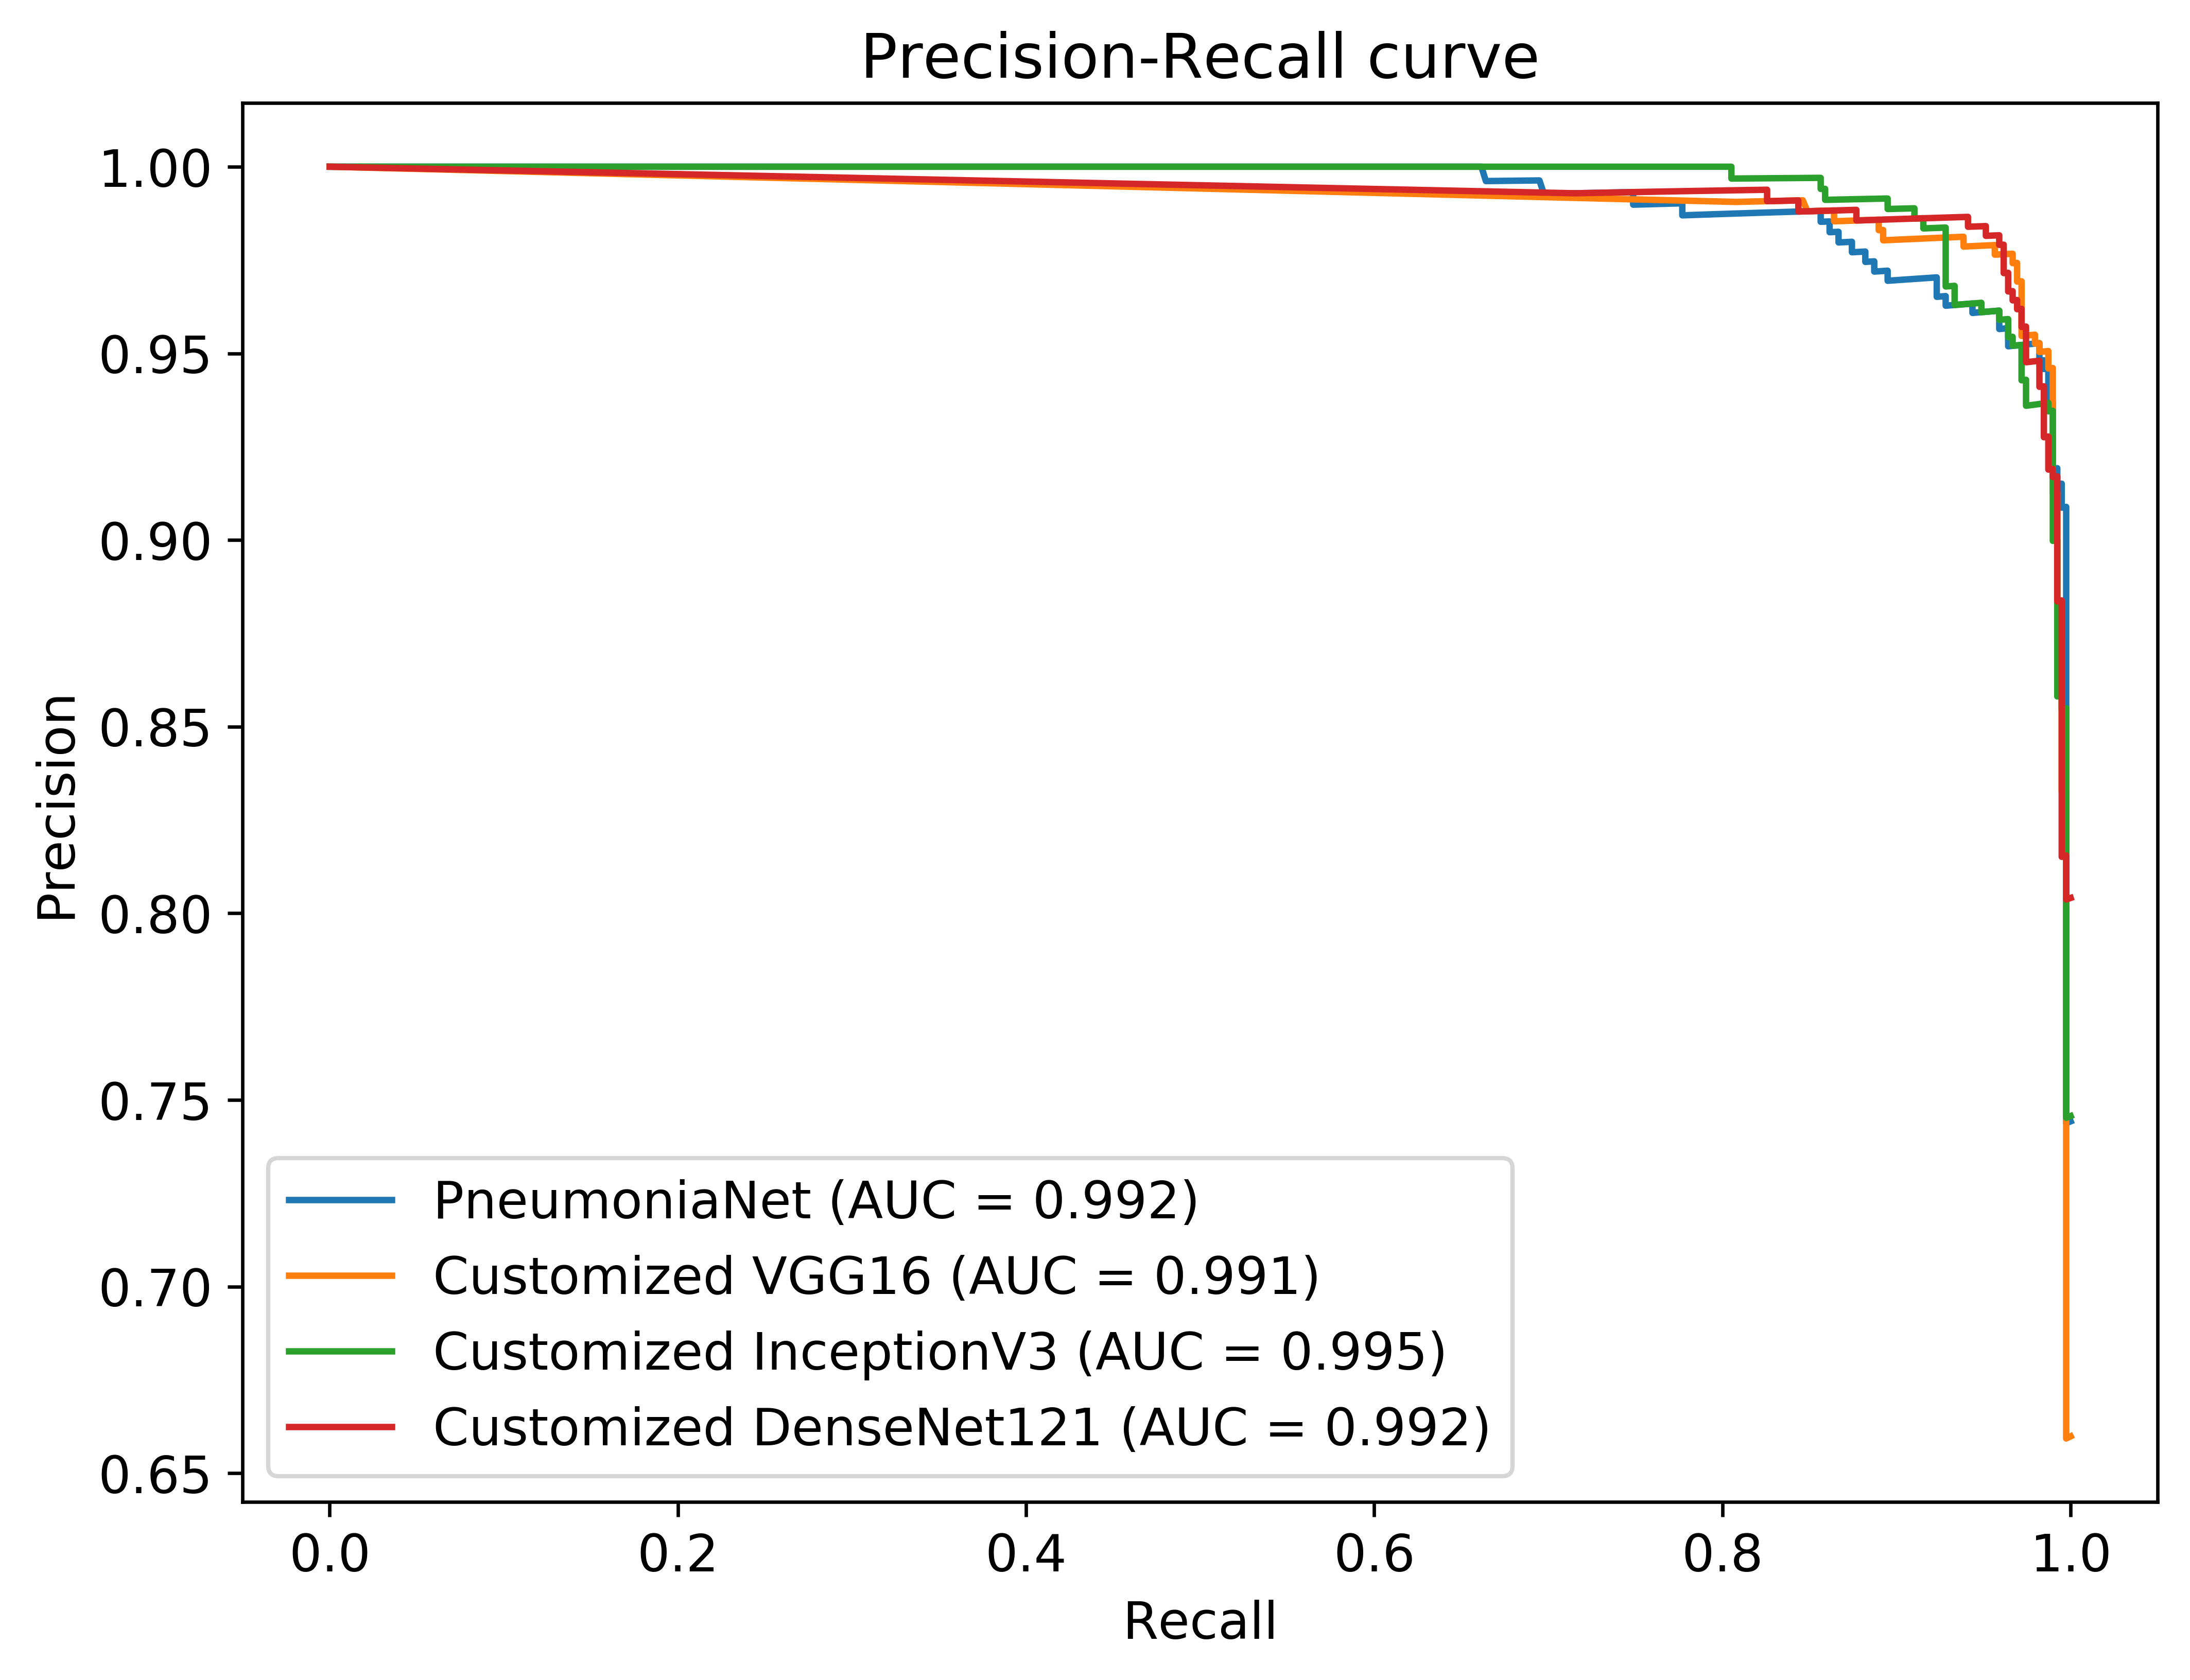

In [17]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,6),dpi=600)
plt.plot(recall1, precision1, label='PneumoniaNet (AUC = {:.3f})'.format(auc_var1))
plt.plot(recall2, precision2, label='Customized VGG16 (AUC = {:.3f})'.format(auc_var2))
plt.plot(recall3, precision3, label='Customized InceptionV3 (AUC = {:.3f})'.format(auc_var3))
plt.plot(recall4, precision4, label='Customized DenseNet121 (AUC = {:.3f})'.format(auc_var4))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.savefig('Precision_Recall_Curve_PneumoniaNet_VGG16_InceptionV3_DenseNet121.jpeg',dpi=1200)
plt.show()